# LSTM and Vader Analysis

In [1]:
import pandas as pd
import numpy as np

# Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')


In [2]:
# Display the first few rows of stock_yfinance_data
print(stock_yfinance_data.head())


        Date        Open        High         Low       Close   Adj Close  \
0  9/30/2021  260.333344  263.043335  258.333344  258.493347  258.493347   
1  10/1/2021  259.466675  260.260010  254.529999  258.406677  258.406677   
2  10/4/2021  265.500000  268.989990  258.706665  260.510010  260.510010   
3  10/5/2021  261.600006  265.769989  258.066681  260.196655  260.196655   
4  10/6/2021  258.733337  262.220001  257.739990  260.916656  260.916656   

     Volume Stock Name  
0  53868000       TSLA  
1  51094200       TSLA  
2  91449900       TSLA  
3  55297800       TSLA  
4  43898400       TSLA  


In [3]:
stock_yfinance_data.shape

(6300, 8)

In [4]:
stock_yfinance_data.tail

<bound method NDFrame.tail of            Date        Open        High         Low       Close   Adj Close  \
0     9/30/2021  260.333344  263.043335  258.333344  258.493347  258.493347   
1     10/1/2021  259.466675  260.260010  254.529999  258.406677  258.406677   
2     10/4/2021  265.500000  268.989990  258.706665  260.510010  260.510010   
3     10/5/2021  261.600006  265.769989  258.066681  260.196655  260.196655   
4     10/6/2021  258.733337  262.220001  257.739990  260.916656  260.916656   
...         ...         ...         ...         ...         ...         ...   
6295  9/23/2022   13.090000   13.892000   12.860000   13.710000   13.710000   
6296  9/26/2022   14.280000   14.830000   14.070000   14.370000   14.370000   
6297  9/27/2022   14.580000   14.800000   13.580000   13.710000   13.710000   
6298  9/28/2022   13.050000   13.421000   12.690000   13.330000   13.330000   
6299  9/29/2022   12.550000   12.850000   11.850000   12.110000   12.110000   

        Volume Stock 

In [5]:
# Check for missing or NaN values in stock_yfinance_data
missing_values = stock_yfinance_data.isnull().sum()

# Print the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Stock Name    0
dtype: int64


In [6]:
# Check for missing values in the 'Close' column
missing_values = stock_yfinance_data['Close'].isnull().sum()

# Print the number of missing values
print("Number of missing values in the 'Close' column:", missing_values)


Number of missing values in the 'Close' column: 0


In [7]:
# Define the list of stock names to filter
stock_names = ['AAPL', 'AMZN', 'NFLX']

# Filter rows where 'Stock Name' is in the list of stock_names
filtered_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(stock_names)]

# Print the filtered data
print(filtered_data)


           Date        Open        High         Low       Close   Adj Close  \
1008  9/30/2021  165.800003  166.392502  163.699493  164.251999  164.251999   
1009  10/1/2021  164.450501  165.458496  162.796997  164.162994  164.162994   
1010  10/4/2021  163.969498  163.999496  158.812500  159.488998  159.488998   
1011  10/5/2021  160.225006  163.036499  160.123001  161.050003  161.050003   
1012  10/6/2021  160.676498  163.216995  159.931000  163.100494  163.100494   
...         ...         ...         ...         ...         ...         ...   
2263  9/23/2022  235.139999  236.449997  221.429993  226.410004  226.410004   
2264  9/26/2022  225.600006  232.699997  223.009995  224.070007  224.070007   
2265  9/27/2022  228.630005  230.639999  220.720001  224.360001  224.360001   
2266  9/28/2022  229.690002  246.649994  227.380005  245.199997  245.199997   
2267  9/29/2022  241.610001  246.979996  235.679993  239.710007  239.710007   

        Volume Stock Name  
1008  56848000       AM

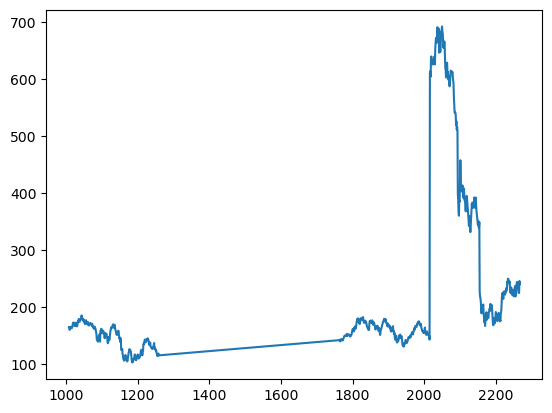

In [8]:
import matplotlib.pyplot as plt

plt.plot(filtered_data['Close'])
plt.show()


In [9]:
filtered_data['date'] = filtered_data.index
filtered_data.head()

/var/folders/58/r_9x1ybd5wb8ldz8z8xxgnbr0000gn/T/ipykernel_21955/2172609614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data.index


Date        Open        High         Low       Close   Adj Close  \
1008  9/30/2021  165.800003  166.392502  163.699493  164.251999  164.251999   
1009  10/1/2021  164.450501  165.458496  162.796997  164.162994  164.162994   
1010  10/4/2021  163.969498  163.999496  158.812500  159.488998  159.488998   
1011  10/5/2021  160.225006  163.036499  160.123001  161.050003  161.050003   
1012  10/6/2021  160.676498  163.216995  159.931000  163.100494  163.100494   

        Volume Stock Name  date  
1008  56848000       AMZN  1008  
1009  56712000       AMZN  1009  
1010  90462000       AMZN  1010  
1011  65384000       AMZN  1011  
1012  50660000       AMZN  1012

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply MinMax scaling to the 'Close' column of filtered_data
dataset = min_max_scaler.fit_transform(filtered_data['Close'].values.reshape(-1, 1))


In [11]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

529 227


In [12]:

dataset[0:10]

array([[0.10509688],
       [0.10494587],
       [0.09701551],
       [0.09966406],
       [0.10314313],
       [0.10657217],
       [0.10540059],
       [0.10181038],
       [0.10189776],
       [0.10503242]])

In [13]:

print(len(filtered_data))
print(227 + 529)

756
756


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(513, 15)
(513,)
(211, 15)
(211,)


In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(513, 1, 15)
(513,)
(211, 1, 15)
(211,)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)


2024-05-24 14:55:52.528807: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


513/513 - 1s - 3ms/step - loss: 0.0132
Epoch 2/20
513/513 - 0s - 948us/step - loss: 0.0043
Epoch 3/20
513/513 - 0s - 960us/step - loss: 0.0030
Epoch 4/20
513/513 - 0s - 943us/step - loss: 0.0023
Epoch 5/20
513/513 - 0s - 909us/step - loss: 0.0021
Epoch 6/20
513/513 - 0s - 888us/step - loss: 0.0020
Epoch 7/20
513/513 - 0s - 884us/step - loss: 0.0018
Epoch 8/20
513/513 - 0s - 883us/step - loss: 0.0017
Epoch 9/20
513/513 - 0s - 891us/step - loss: 0.0018
Epoch 10/20
513/513 - 0s - 907us/step - loss: 0.0017
Epoch 11/20
513/513 - 0s - 885us/step - loss: 0.0017
Epoch 12/20
513/513 - 0s - 883us/step - loss: 0.0016
Epoch 13/20
513/513 - 0s - 882us/step - loss: 0.0016
Epoch 14/20
513/513 - 0s - 963us/step - loss: 0.0016
Epoch 15/20
513/513 - 1s - 1ms/step - loss: 0.0016
Epoch 16/20
513/513 - 1s - 1ms/step - loss: 0.0015
Epoch 17/20
513/513 - 0s - 832us/step - loss: 0.0015
Epoch 18/20
513/513 - 0s - 792us/step - loss: 0.0014
Epoch 19/20
513/513 - 0s - 933us/step - loss: 0.0016
Epoch 20/20
513/513

In [26]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train Score: 24.19 RMSE
Test Score: 29.18 RMSE


In [27]:
# Calculate root mean squared error
rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('RMSE: %.2f' % rmse)

# Calculate R-squared
r_squared = r2_score(testY[0], testPredict[:,0])
print('R-squared: %.2f' % r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testY[0], testPredict[:,0])
print('MAE: %.2f' % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((testY[0] - testPredict[:,0]) / testY[0])) * 100
print('MAPE: %.2f%%' % mape)


RMSE: 29.18
R-squared: 0.96
MAE: 21.13
MAPE: 6.50%


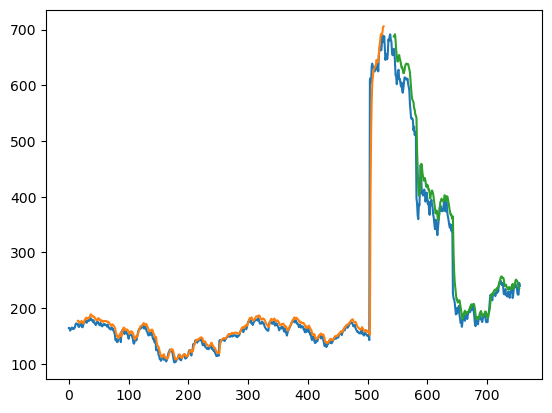

In [28]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [29]:
###Adding Regularisation and increasing epochs

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import regularizers

# create and fit the LSTM network with L2 regularization
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
513/513 - 1s - 3ms/step - loss: 0.0823
Epoch 2/100
513/513 - 0s - 821us/step - loss: 0.0148
Epoch 3/100
513/513 - 0s - 800us/step - loss: 0.0092
Epoch 4/100
513/513 - 0s - 809us/step - loss: 0.0077
Epoch 5/100
513/513 - 0s - 795us/step - loss: 0.0066
Epoch 6/100
513/513 - 0s - 804us/step - loss: 0.0062
Epoch 7/100
513/513 - 0s - 796us/step - loss: 0.0058
Epoch 8/100
513/513 - 0s - 789us/step - loss: 0.0061
Epoch 9/100
513/513 - 0s - 805us/step - loss: 0.0052
Epoch 10/100
513/513 - 0s - 798us/step - loss: 0.0057
Epoch 11/100
513/513 - 0s - 796us/step - loss: 0.0052
Epoch 12/100
513/513 - 0s - 815us/step - loss: 0.0053
Epoch 13/100
513/513 - 0s - 914us/step - loss: 0.0045
Epoch 14/100
513/513 - 0s - 819us/step - loss: 0.0042
Epoch 15/100
513/513 - 0s - 819us/step - loss: 0.0048
Epoch 16/100
513/513 - 0s - 861us/step - loss: 0.0049
Epoch 17/100
513/513 - 0s - 801us/step - loss: 0.0054
Epoch 18/100
513/513 - 0s - 790us/step - loss: 0.0042
Epoch 19/100
513/513 - 0s - 810us/step 

In [31]:
# Calculate root mean squared error
rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('RMSE: %.2f' % rmse)

# Calculate R-squared
r_squared = r2_score(testY[0], testPredict[:,0])
print('R-squared: %.2f' % r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testY[0], testPredict[:,0])
print('MAE: %.2f' % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((testY[0] - testPredict[:,0]) / testY[0])) * 100
print('MAPE: %.2f%%' % mape)

RMSE: 29.18
R-squared: 0.96
MAE: 21.13
MAPE: 6.50%


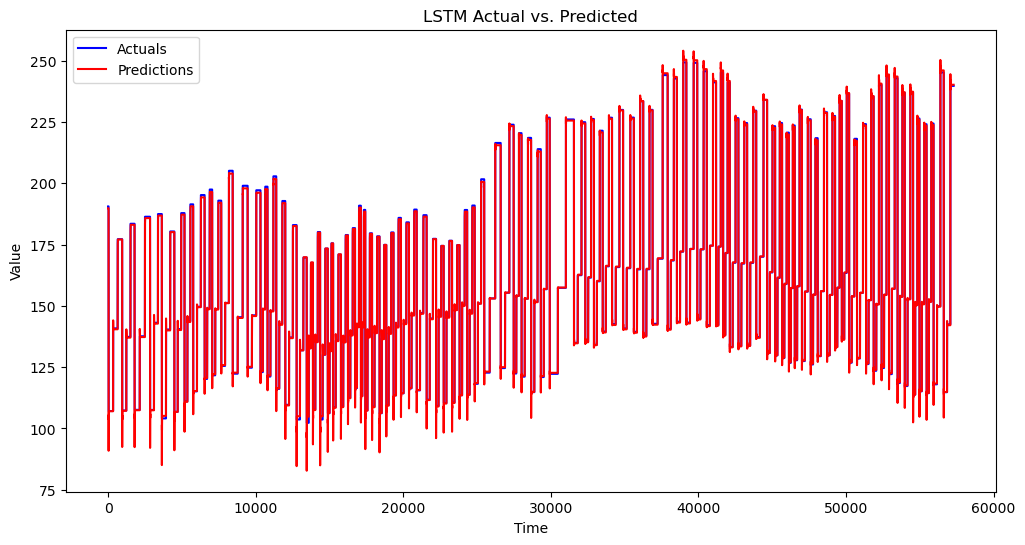

In [100]:
import matplotlib.pyplot as plt

# Plot actuals and predictions
plt.figure(figsize=(12, 6))
plt.plot(testY[0], label='Actuals', color='blue')
plt.plot(testPredict[:,0], label='Predictions', color='red')
plt.title('LSTM Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Merged Data for stock_yfinance data and stock_tweets

In [32]:
##file_path = "debasmitamohanty/UpGradDataScienceMastersProgram/researchLJMU/archive-2/stock_yfinance_data.csv"
stock_yfinance_data=pd.read_csv('stock_yfinance_data.csv')

In [33]:
stock_tweets=pd.read_csv('stock_tweets.csv')

In [34]:
stock_yfinance_data.head()

Date        Open        High         Low       Close   Adj Close  \
0  9/30/2021  260.333344  263.043335  258.333344  258.493347  258.493347   
1  10/1/2021  259.466675  260.260010  254.529999  258.406677  258.406677   
2  10/4/2021  265.500000  268.989990  258.706665  260.510010  260.510010   
3  10/5/2021  261.600006  265.769989  258.066681  260.196655  260.196655   
4  10/6/2021  258.733337  262.220001  257.739990  260.916656  260.916656   

     Volume Stock Name  
0  53868000       TSLA  
1  51094200       TSLA  
2  91449900       TSLA  
3  55297800       TSLA  
4  43898400       TSLA

In [35]:
stock_tweets.head()

Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.

In [38]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')

# Convert Date columns to date format
stock_tweets['Date'] = pd.to_datetime(stock_tweets['Date']).dt.date
stock_yfinance_data['Date'] = pd.to_datetime(stock_yfinance_data['Date']).dt.date

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(tweet):
    if pd.isnull(tweet):
        return 0, 0, 0, 0  # Return 0 for all scores if the tweet is NaN
    scores = analyzer.polarity_scores(tweet)
    return scores['compound'], scores['pos'], scores['neg'], scores['neu']

# Apply sentiment analysis to the Tweet column
stock_tweets[['Compound', 'Positive', 'Negative', 'Neutral']] = stock_tweets['Tweet'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

# Merge datasets on the Date column
merged_data = pd.merge(stock_yfinance_data, stock_tweets, on='Date', how='inner')

# Drop the duplicate 'Stock Name' column if it exists
if 'Stock Name_y' in merged_data.columns:
    merged_data = merged_data.drop(columns=['Stock Name_y'])

# Rename the 'Stock Name_x' column to 'Stock Name' if needed
if 'Stock Name_x' in merged_data.columns:
    merged_data = merged_data.rename(columns={'Stock Name_x': 'Stock Name'})

# Filter for specific stocks
filtered_data = merged_data[merged_data['Stock Name'].isin(['AAPL', 'NFLX', 'AMZN'])]

# Display the first few rows of the filtered data
print(filtered_data.head())


           Date        Open        High         Low       Close   Adj Close  \
712  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
713  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
714  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
715  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
716  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

       Volume Stock Name                                              Tweet  \
712  56848000       AMZN  #LottoFriday Watchlist: short &amp; sweet\n\n$...   
713  56848000       AMZN  CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...   
714  56848000       AMZN  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...   
715  56848000       AMZN  California DMV today issued autonomous vehicle...   
716  56848000       AMZN  @chamath Appreciate the clarification @chamath...   

    Company Name  Compound  Positive  Negative  Ne

In [39]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(tweet):
    if pd.isnull(tweet):
        return 0, 0, 0, 0  # Return 0 for all scores if the tweet is NaN
    scores = analyzer.polarity_scores(tweet)
    return scores['compound'], scores['pos'], scores['neg'], scores['neu']

# Apply sentiment analysis to the Tweet column
filtered_data[['Compound', 'Positive', 'Negative', 'Neutral']] = filtered_data['Tweet'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

/var/folders/58/r_9x1ybd5wb8ldz8z8xxgnbr0000gn/T/ipykernel_21955/2259699972.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['Compound', 'Positive', 'Negative', 'Neutral']] = filtered_data['Tweet'].apply(


In [40]:
print(filtered_data.head())

           Date        Open        High         Low       Close   Adj Close  \
712  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
713  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
714  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
715  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
716  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

       Volume Stock Name                                              Tweet  \
712  56848000       AMZN  #LottoFriday Watchlist: short &amp; sweet\n\n$...   
713  56848000       AMZN  CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...   
714  56848000       AMZN  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...   
715  56848000       AMZN  California DMV today issued autonomous vehicle...   
716  56848000       AMZN  @chamath Appreciate the clarification @chamath...   

    Company Name  Compound  Positive  Negative  Ne

In [41]:
import re

# Filter tweet data for NFLX and AMZN
filtered_stock2 = filtered_data[filtered_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Text preprocessing function
def preprocess_tweet(tweet):
    '''Clean text data, removing special characters and URLs'''
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove RT (retweet) text
    tweet = re.sub('RT @\w+: ', '', tweet)
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    # Remove special characters and punctuation
    tweet = re.sub(r"[^\w\s]", '', tweet)
    return tweet

def remove_emoticons(tweet):
    # Define emoticon pattern
    emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002700-\U000027BF\U00002600-\U000026FF\U00002B50\U00002B55\U0001F004\U0001F0CF\U0001F18E\U0001F191-\U0001F19A\U0001F1E6-\U0001F1FF\U0001F201\U0001F202\U0001F21A\U0001F22F\U0001F232-\U0001F23A\U0001F250-\U0001F251\U0001F300-\U0001F320\U0001F321-\U0001F32C\U0001F32D-\U0001F32F\U0001F330-\U0001F335\U0001F336\U0001F337-\U0001F37C\U0001F37D\U0001F37E-\U0001F37F\U0001F380-\U0001F393\U0001F394-\U0001F39F\U0001F3A0-\U0001F3C4\U0001F3C5-\U0001F3C7]'
    # Remove emoticons using regex
    return re.sub(emoticon_pattern, '', text)


# Print cleaned tweets
for tweet in filtered_stock2['Tweet']:
    cleaned_tweet = preprocess_tweet(tweet)
    print(cleaned_tweet)

lottofriday watchlist short amp sweet

amd over 1045 105c
roku over 317 320c
nvda below 207 205p
tsla below 774 770p

i will be guiding my entries amp exits in real time via voice chat at gaaoptionsvip 

good luck traders
correction update

update on q3 delivery estimates

 factset  204k
 wall street  221k
 gary  226k
 troy  235k today upgrade
 twitter bulls  230k240k
 wilson frunkpuppy 240k
 goldie  246k
 robtesla daily  247k
 giddy  250k
 umbisam   gt250k
tsla 
free options ideas 

scale out when above 25 profit

tsla   790c gt78887  775p lt77509
nio     36c gt3596  35p lt3532
mu      73c gt7256  70p lt7086
snap  76c gt7521  72p lt7226

199  for more secret bonus picks

tsla very rare double ib last seen in 2020 
california dmv today issued autonomous vehicle permits to cruise and waymo to charge the public for autonomous rides in select bay area cities to receive permits vehicles must meet the definition of sae level 34or 5 autonomous technology tsla 
chamath appreciate the clarific

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(tweet):
    if pd.isnull(tweet):
        return 0, 0, 0, 0  # Return 0 for all scores if the tweet is NaN
    scores = analyzer.polarity_scores(tweet)
    return scores['compound'], scores['pos'], scores['neg'], scores['neu']

# Apply sentiment analysis to the Tweet column
filtered_data[['Compound', 'Positive', 'Negative', 'Neutral']] = filtered_stock2['Tweet'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)



/var/folders/58/r_9x1ybd5wb8ldz8z8xxgnbr0000gn/T/ipykernel_21955/3546595074.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['Compound', 'Positive', 'Negative', 'Neutral']] = filtered_stock2['Tweet'].apply(


In [43]:
print(filtered_stock2)


               Date        Open        High         Low       Close  \
712      2021-09-30  165.800003  166.392502  163.699493  164.251999   
713      2021-09-30  165.800003  166.392502  163.699493  164.251999   
714      2021-09-30  165.800003  166.392502  163.699493  164.251999   
715      2021-09-30  165.800003  166.392502  163.699493  164.251999   
716      2021-09-30  165.800003  166.392502  163.699493  164.251999   
...             ...         ...         ...         ...         ...   
1588311  2022-09-29  241.610001  246.979996  235.679993  239.710007   
1588312  2022-09-29  241.610001  246.979996  235.679993  239.710007   
1588313  2022-09-29  241.610001  246.979996  235.679993  239.710007   
1588314  2022-09-29  241.610001  246.979996  235.679993  239.710007   
1588315  2022-09-29  241.610001  246.979996  235.679993  239.710007   

          Adj Close    Volume Stock Name  \
712      164.251999  56848000       AMZN   
713      164.251999  56848000       AMZN   
714      164.25

In [44]:
unique_stock_names = filtered_stock2['Stock Name'].unique()
print("Unique stock names in the filtered data:", unique_stock_names)

Unique stock names in the filtered data: ['AMZN' 'AAPL' 'NFLX']


In [45]:
# Combine Compound, Negative, Positive, and Neutral into one column 'Sentiments'
filtered_stock2['Sentiments'] = filtered_stock2[['Compound', 'Negative', 'Positive', 'Neutral']].sum(axis=1)

# Display the DataFrame with the new 'Sentiments' column
print(filtered_stock2.head())


           Date        Open        High         Low       Close   Adj Close  \
712  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
713  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
714  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
715  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
716  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

       Volume Stock Name                                              Tweet  \
712  56848000       AMZN  #LottoFriday Watchlist: short &amp; sweet\n\n$...   
713  56848000       AMZN  CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...   
714  56848000       AMZN  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...   
715  56848000       AMZN  California DMV today issued autonomous vehicle...   
716  56848000       AMZN  @chamath Appreciate the clarification @chamath...   

    Company Name  Compound  Positive  Negative  Ne

In [46]:
# Create a new DataFrame with 'Close', 'Date', and 'Sentiments' columns
new_df = filtered_stock2[['Close', 'Date', 'Sentiments']].copy()

# Display the new DataFrame
print(new_df.head())


          Close        Date  Sentiments
712  164.251999  2021-09-30      1.8478
713  164.251999  2021-09-30      0.8469
714  164.251999  2021-09-30      1.9083
715  164.251999  2021-09-30      1.0000
716  164.251999  2021-09-30      1.4019


In [47]:
print(new_df.Date)

712        2021-09-30
713        2021-09-30
714        2021-09-30
715        2021-09-30
716        2021-09-30
              ...    
1588311    2022-09-29
1588312    2022-09-29
1588313    2022-09-29
1588314    2022-09-29
1588315    2022-09-29
Name: Date, Length: 191028, dtype: object


In [48]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('2021-09-30')
datetime_object

datetime.datetime(2021, 9, 30, 0, 0)

In [49]:
new_df

Close        Date  Sentiments
712      164.251999  2021-09-30      1.8478
713      164.251999  2021-09-30      0.8469
714      164.251999  2021-09-30      1.9083
715      164.251999  2021-09-30      1.0000
716      164.251999  2021-09-30      1.4019
...             ...         ...         ...
1588311  239.710007  2022-09-29      1.4019
1588312  239.710007  2022-09-29      1.5574
1588313  239.710007  2022-09-29      1.0000
1588314  239.710007  2022-09-29      1.0000
1588315  239.710007  2022-09-29      1.0000

[191028 rows x 3 columns]

In [65]:
import datetime

def str_to_datetime(s):
    if isinstance(s, datetime.date):
        return s
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)



new_df['Date'] = new_df['Date'].apply(str_to_datetime)
new_df['Date']

0         2021-09-30
1         2021-09-30
2         2021-09-30
3         2021-09-30
4         2021-09-30
             ...    
191023    2022-09-29
191024    2022-09-29
191025    2022-09-29
191026    2022-09-29
191027    2022-09-29
Name: Date, Length: 191028, dtype: object

In [51]:
new_df.reset_index(inplace=True)
new_df.head

<bound method NDFrame.head of           index       Close        Date  Sentiments
0           712  164.251999  2021-09-30      1.8478
1           713  164.251999  2021-09-30      0.8469
2           714  164.251999  2021-09-30      1.9083
3           715  164.251999  2021-09-30      1.0000
4           716  164.251999  2021-09-30      1.4019
...         ...         ...         ...         ...
191023  1588311  239.710007  2022-09-29      1.4019
191024  1588312  239.710007  2022-09-29      1.5574
191025  1588313  239.710007  2022-09-29      1.0000
191026  1588314  239.710007  2022-09-29      1.0000
191027  1588315  239.710007  2022-09-29      1.0000

[191028 rows x 4 columns]>

In [52]:
# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply MinMax scaling to the 'Close' column of filtered_aapl_data
df2 = min_max_scaler.fit_transform(new_df['Close'].values.reshape(-1, 1))

In [64]:
# split into train and test sets
train_size = int(len(df2) * 0.7)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]
print(len(train), len(test))

133719 57309


In [54]:

print(len(df2))
print(133719 + 57309)

191028
191028


In [74]:
# convert an array of values into a dataset matrix
def create_dataset2(df2, look_back=15):
    dataX, dataY = [], []
    for i in range(len(df2)-look_back-1):
        a = df2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [75]:
x1_train, y1_train = create_dataset2(train, look_back=15)
x1_test, y1_test = create_dataset2(test, look_back=15)

In [76]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(133703, 15)
(133703,)
(57293, 15)
(57293,)


In [77]:
x1_train = np.reshape(x1_train, (x1_train.shape[0], 1, x1_train.shape[1]))
x1_test = np.reshape(x1_test, (x1_test.shape[0], 1, x1_test.shape[1]))

In [78]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(133703, 1, 15)
(133703,)
(57293, 1, 15)
(57293,)


In [79]:
# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x1_train, y1_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133703/133703 - 97s - 728us/step - loss: 0.0011
Epoch 2/20
133703/133703 - 97s - 725us/step - loss: 9.6697e-04
Epoch 3/20
133703/133703 - 98s - 730us/step - loss: 9.4794e-04
Epoch 4/20
133703/133703 - 98s - 729us/step - loss: 9.3635e-04
Epoch 5/20
133703/133703 - 98s - 732us/step - loss: 9.2759e-04
Epoch 6/20
133703/133703 - 97s - 729us/step - loss: 9.1912e-04
Epoch 7/20
133703/133703 - 162s - 1ms/step - loss: 9.1555e-04
Epoch 8/20
133703/133703 - 98s - 733us/step - loss: 9.0828e-04
Epoch 9/20
133703/133703 - 97s - 725us/step - loss: 9.0295e-04
Epoch 10/20
133703/133703 - 97s - 728us/step - loss: 9.0168e-04
Epoch 11/20
133703/133703 - 98s - 735us/step - loss: 8.9660e-04
Epoch 12/20
133703/133703 - 97s - 729us/step - loss: 8.9576e-04
Epoch 13/20
133703/133703 - 98s - 734us/step - loss: 8.9556e-04
Epoch 14/20
133703/133703 - 99s - 742us/step - loss: 8.9526e-04
Epoch 15/20
133703/133703 - 97s - 729us/step - loss: 8.9537e-04
Epoch 16/20
133703/133703 - 98s - 731us/step - loss: 8.9353e-04
E

In [85]:
trainPredict = model.predict(x1_train)
testPredict = model.predict(x1_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y1_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y1_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4179/4179 ━━━━━━━━━━━━━━━━━━━━ 3s 665us/step
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step
Train Score: 17.11 RMSE
Test Score: 4.81 RMSE


In [86]:
# Calculate root mean squared error
rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('RMSE: %.2f' % rmse)

# Calculate R-squared
r_squared = r2_score(testY[0], testPredict[:,0])
print('R-squared: %.2f' % r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testY[0], testPredict[:,0])
print('MAE: %.2f' % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((testY[0] - testPredict[:,0]) / testY[0])) * 100
print('MAPE: %.2f%%' % mape)


RMSE: 4.81
R-squared: 0.99
MAE: 1.23
MAPE: 0.78%


In [87]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [88]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# 

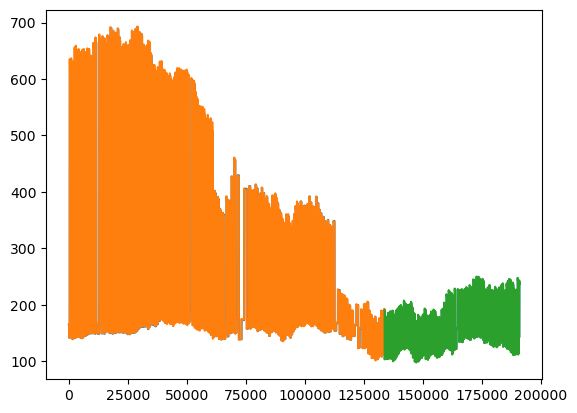

In [89]:
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Hypertuning

In [91]:
# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x1_train, y1_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
133703/133703 - 121s - 905us/step - loss: 0.0011
Epoch 2/50
133703/133703 - 122s - 909us/step - loss: 9.6225e-04
Epoch 3/50
133703/133703 - 126s - 944us/step - loss: 9.5376e-04
Epoch 4/50
133703/133703 - 124s - 929us/step - loss: 9.4079e-04
Epoch 5/50
133703/133703 - 118s - 880us/step - loss: 9.3528e-04
Epoch 6/50
133703/133703 - 113s - 846us/step - loss: 9.2902e-04
Epoch 7/50
133703/133703 - 122s - 916us/step - loss: 9.2407e-04
Epoch 8/50
133703/133703 - 125s - 936us/step - loss: 9.1803e-04
Epoch 9/50
133703/133703 - 120s - 900us/step - loss: 9.1436e-04
Epoch 10/50
133703/133703 - 123s - 918us/step - loss: 9.0817e-04
Epoch 11/50
133703/133703 - 113s - 848us/step - loss: 9.0479e-04
Epoch 12/50
133703/133703 - 114s - 851us/step - loss: 9.0270e-04
Epoch 13/50
133703/133703 - 125s - 933us/step - loss: 8.9786e-04
Epoch 14/50
133703/133703 - 117s - 877us/step - loss: 8.9745e-04
Epoch 15/50
133703/133703 - 112s - 839us/step - loss: 8.9787e-04
Epoch 16/50
133703/133703 - 112s - 839

In [92]:
trainPredict = model.predict(x1_train)
testPredict = model.predict(x1_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y1_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y1_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4179/4179 ━━━━━━━━━━━━━━━━━━━━ 3s 769us/step
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step
Train Score: 17.10 RMSE
Test Score: 4.61 RMSE


In [93]:
# Calculate root mean squared error
rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('RMSE: %.2f' % rmse)

# Calculate R-squared
r_squared = r2_score(testY[0], testPredict[:,0])
print('R-squared: %.2f' % r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testY[0], testPredict[:,0])
print('MAE: %.2f' % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((testY[0] - testPredict[:,0]) / testY[0])) * 100
print('MAPE: %.2f%%' % mape)


RMSE: 4.61
R-squared: 0.99
MAE: 0.75
MAPE: 0.49%


In [94]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [95]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# 

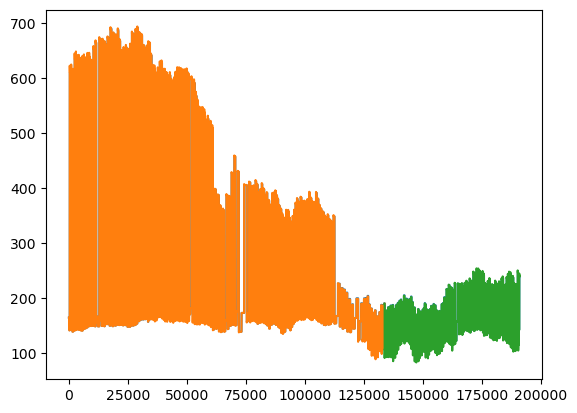

In [96]:
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


                 Close  Sentiments
Date                              
2021-09-30  164.251999      1.8478
2021-09-30  164.251999      0.8469
2021-09-30  164.251999      1.9083
2021-09-30  164.251999      1.0000
2021-09-30  164.251999      1.4019


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 119s 28ms/step - loss: 0.0055 - val_loss: 5.0572e-05
Epoch 2/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 100s 26ms/step - loss: 0.0017 - val_loss: 5.4000e-05
Epoch 3/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 100s 26ms/step - loss: 0.0016 - val_loss: 7.6381e-05
Epoch 4/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 103s 27ms/step - loss: 0.0018 - val_loss: 4.5346e-05
Epoch 5/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 101s 26ms/step - loss: 0.0016 - val_loss: 5.4429e-05
Epoch 6/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 105s 27ms/step - loss: 0.0016 - val_loss: 5.5603e-05
Epoch 7/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 104s 27ms/step - loss: 0.0016 - val_loss: 9.3671e-05
Epoch 8/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 109s 28ms/step - loss: 0.0015 - val_loss: 4.0760e-05
Epoch 9/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 127s 33ms/step - loss: 0.0015 - val_loss: 1.1967e-04
Epoch 10/100
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 115s 30ms/step - loss: 0.0015 - val_loss: 4.3238e-05
Epoch 11/100
3820/3820 ━━━━━━━━━━━━━━━━

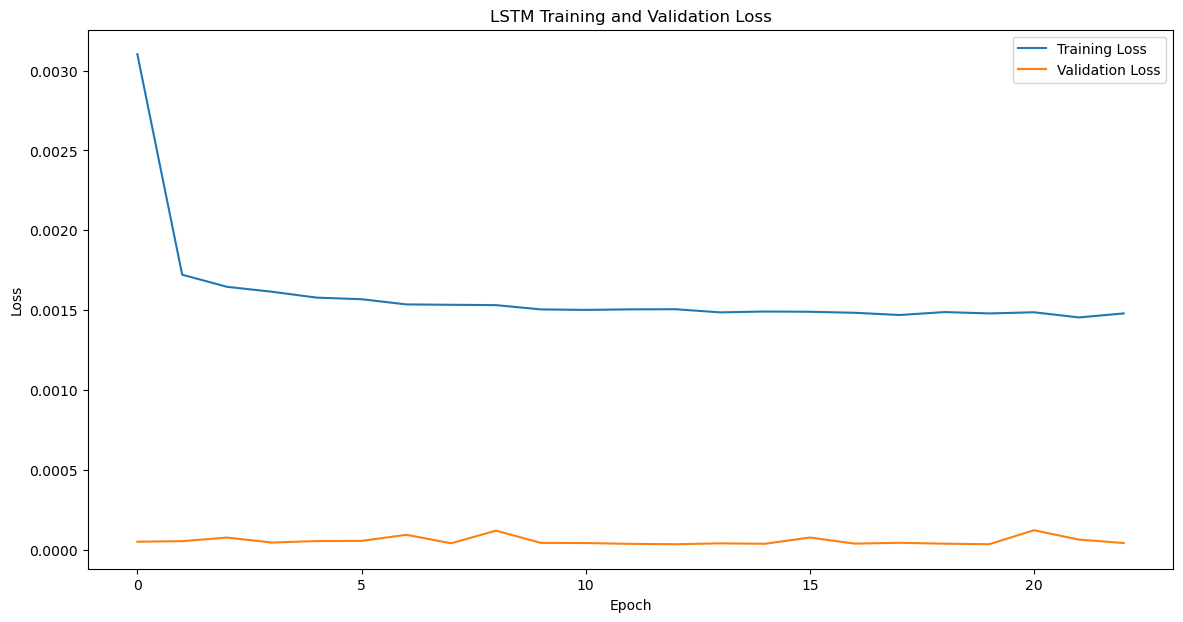

1194/1194 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


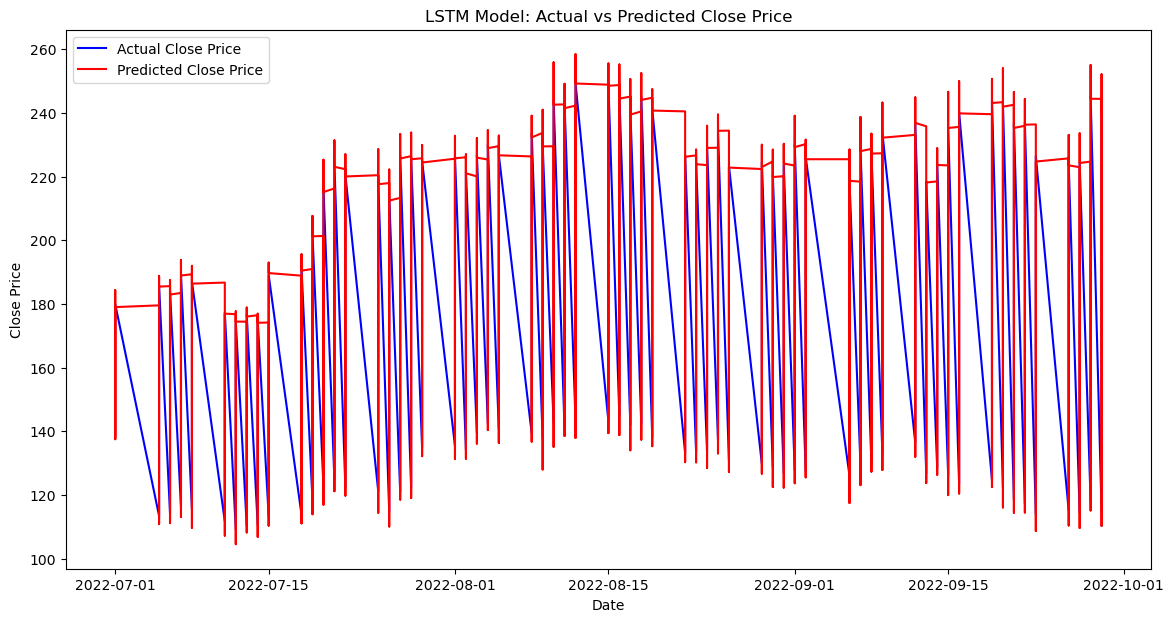

RMSE: 4.933962519132734
MAE: 0.8561293799603287


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


new_df = filtered_stock2[['Close', 'Date', 'Sentiments']].copy()

# Convert 'Date' to datetime and set it as the index
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.set_index('Date', inplace=True)

# Display the new DataFrame
print(new_df.head())

# Sort the DataFrame by date
new_df.sort_index(inplace=True)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length, :]
        y = data[i + seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60  # 
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(np.concatenate((predicted_stock_price, X_test[:, -1, 1:]), axis=1))[:, 0]

# Inverse transform the actual stock prices
actual_stock_price = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(new_df.index[-len(y_test):], actual_stock_price, color='blue', label='Actual Close Price')
plt.plot(new_df.index[-len(y_test):], predicted_stock_price, color='red', label='Predicted Close Price')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


                 Close  Sentiments
Date                              
2021-09-30  164.251999      1.8478
2021-09-30  164.251999      0.8469
2021-09-30  164.251999      1.9083
2021-09-30  164.251999      1.0000
2021-09-30  164.251999      1.4019


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 122s 31ms/step - loss: 0.0049 - val_loss: 4.9004e-05
Epoch 2/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 118s 31ms/step - loss: 0.0018 - val_loss: 4.1147e-05
Epoch 3/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 121s 32ms/step - loss: 0.0018 - val_loss: 4.3649e-05
Epoch 4/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 120s 31ms/step - loss: 0.0016 - val_loss: 3.9135e-05
Epoch 5/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 120s 32ms/step - loss: 0.0015 - val_loss: 6.1675e-05
Epoch 6/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 123s 32ms/step - loss: 0.0015 - val_loss: 1.6016e-04
Epoch 7/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 103s 27ms/step - loss: 0.0016 - val_loss: 5.5154e-05
Epoch 8/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 103s 27ms/step - loss: 0.0017 - val_loss: 4.1480e-05
Epoch 9/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 109s 29ms/step - loss: 0.0015 - val_loss: 3.7959e-05
Epoch 10/10
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 112s 29ms/step - loss: 0.0014 - val_loss: 4.5019e-05


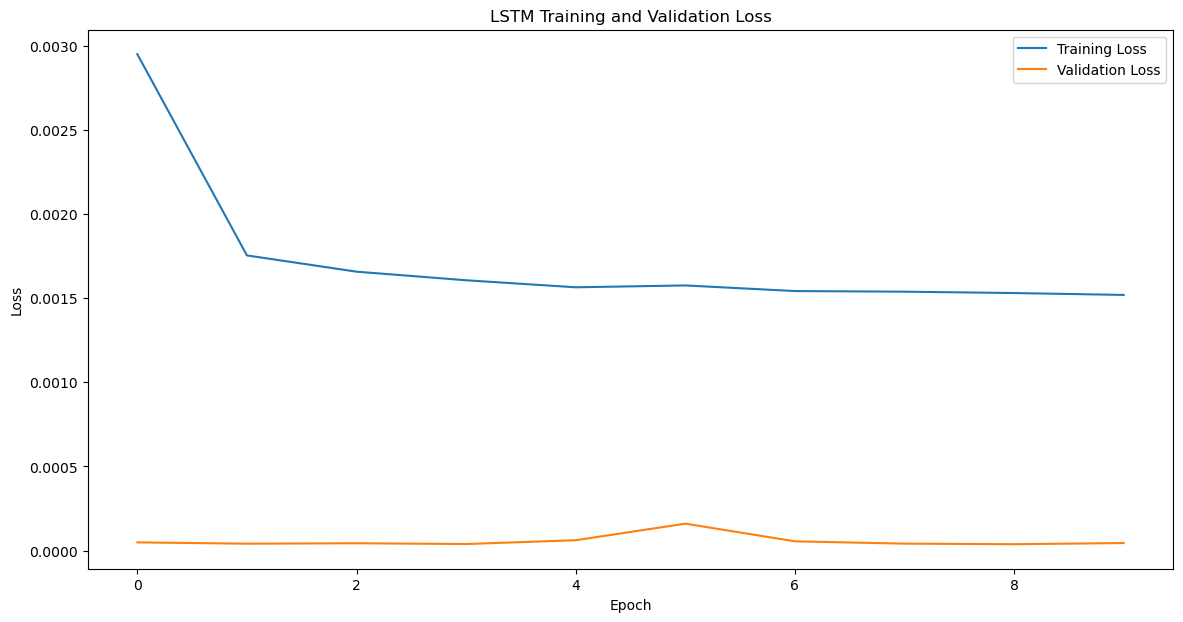

1194/1194 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


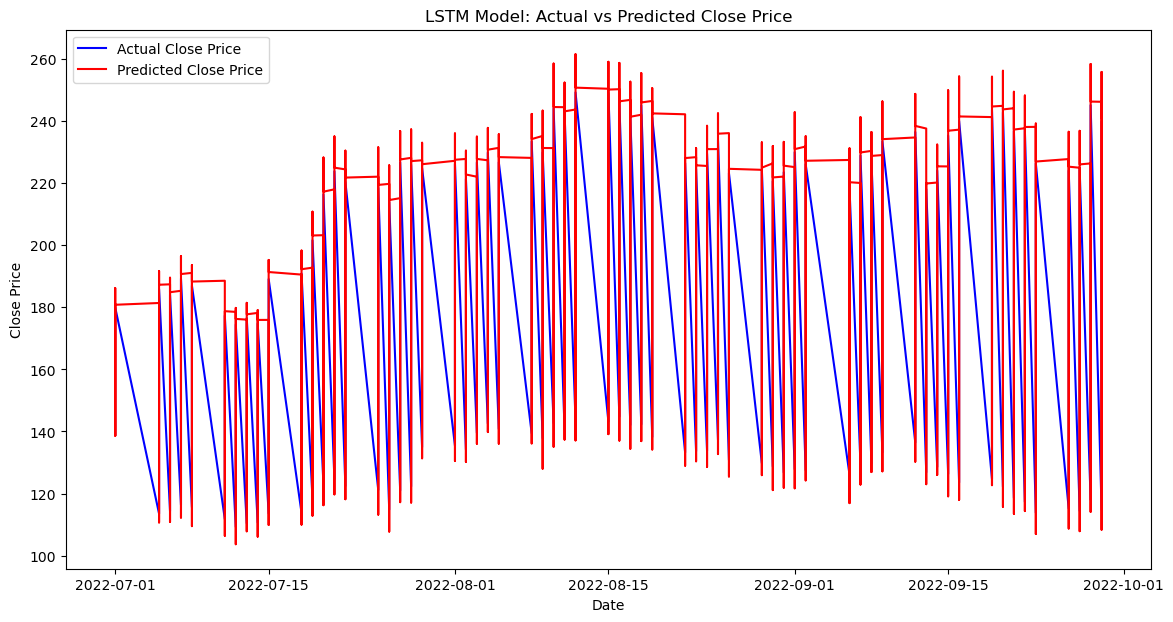

RMSE: 5.064367562017515
MAE: 1.4276198977125878
R-squared: 0.9855612950977762
MAPE: 0.8656024970002816


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


new_df = filtered_stock2[['Close', 'Date', 'Sentiments']].copy()

# Convert 'Date' to datetime and set it as the index
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.set_index('Date', inplace=True)

# Display the new DataFrame
print(new_df.head())

# Sort the DataFrame by date
new_df.sort_index(inplace=True)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length, :]
        y = data[i + seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60  # You can adjust the sequence length
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(np.concatenate((predicted_stock_price, X_test[:, -1, 1:]), axis=1))[:, 0]

# Inverse transform the actual stock prices
actual_stock_price = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(new_df.index[-len(y_test):], actual_stock_price, color='blue', label='Actual Close Price')
plt.plot(new_df.index[-len(y_test):], predicted_stock_price, color='red', label='Predicted Close Price')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
r_squared = r2_score(actual_stock_price, predicted_stock_price)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_stock_price, predicted_stock_price)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r_squared}')
print(f'MAPE: {mape}')


                 Close  Sentiments
Date                              
2021-09-30  164.251999      1.8478
2021-09-30  164.251999      0.8469
2021-09-30  164.251999      1.9083
2021-09-30  164.251999      1.0000
2021-09-30  164.251999      1.4019


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 115s 29ms/step - loss: 0.0056 - val_loss: 5.8605e-05
Epoch 2/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 110s 29ms/step - loss: 0.0018 - val_loss: 4.3005e-05
Epoch 3/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 113s 30ms/step - loss: 0.0017 - val_loss: 5.8909e-05
Epoch 4/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 103s 27ms/step - loss: 0.0017 - val_loss: 7.7036e-05
Epoch 5/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 104s 27ms/step - loss: 0.0016 - val_loss: 2.9081e-04
Epoch 6/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 107s 28ms/step - loss: 0.0016 - val_loss: 4.9268e-05
Epoch 7/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 117s 31ms/step - loss: 0.0015 - val_loss: 7.3230e-05
Epoch 8/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 127s 33ms/step - loss: 0.0016 - val_loss: 4.3054e-05
Epoch 9/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 111s 29ms/step - loss: 0.0015 - val_loss: 4.2989e-05
Epoch 10/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 112s 29ms/step - loss: 0.0015 - val_loss: 4.9562e-05
Epoch 11/50
3820/3820 ━━━━━━━━━━━━━━━━━━━━ 125s 3

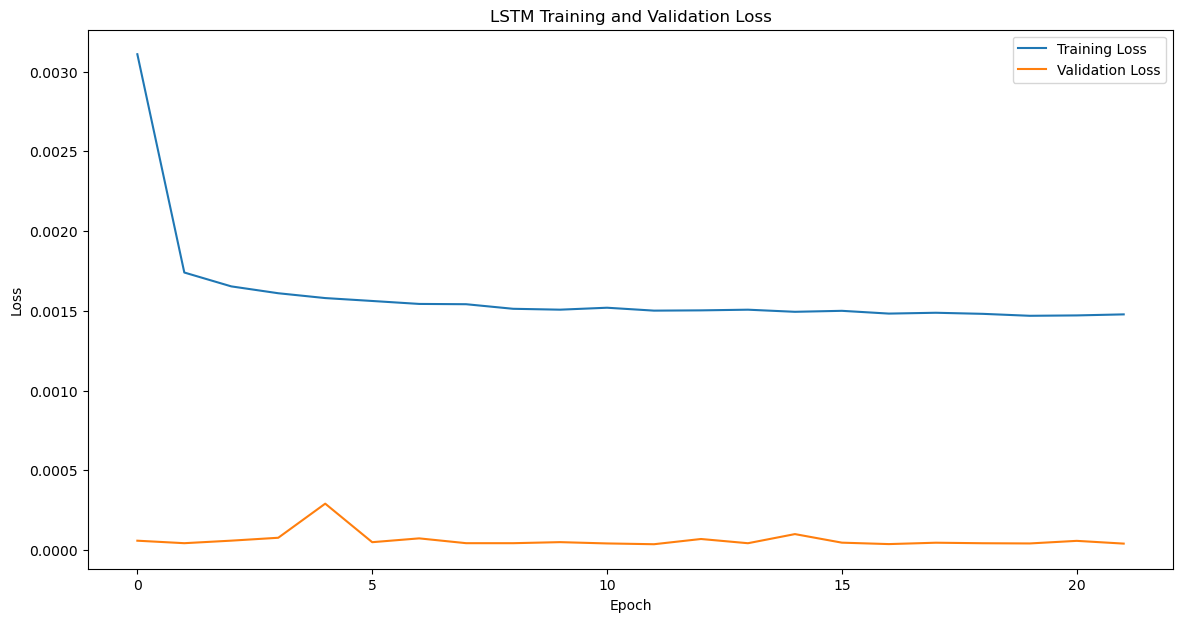

1194/1194 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step


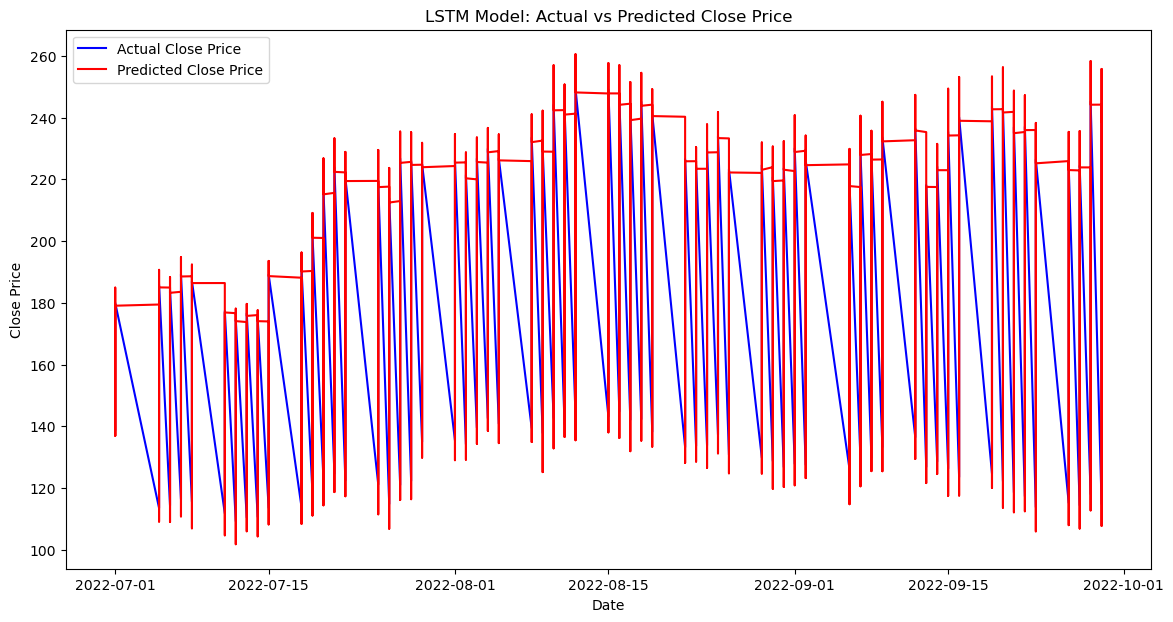

RMSE: 4.996860741463564
MAE: 1.2080257860773276
R-squared: 0.9859436586269537
MAPE: 0.7532789296474262


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 
new_df = filtered_stock2[['Close', 'Date', 'Sentiments']].copy()

# Convert 'Date' to datetime and set it as the index
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.set_index('Date', inplace=True)

# Display the new DataFrame
print(new_df.head())

# Sort the DataFrame by date
new_df.sort_index(inplace=True)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length, :]
        y = data[i + seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60  # we can adjust the sequence length
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(np.concatenate((predicted_stock_price, X_test[:, -1, 1:]), axis=1))[:, 0]

# Inverse transform the actual stock prices
actual_stock_price = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(new_df.index[-len(y_test):], actual_stock_price, color='blue', label='Actual Close Price')
plt.plot(new_df.index[-len(y_test):], predicted_stock_price, color='red', label='Predicted Close Price')
plt.title('LSTM Model: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
r_squared = r2_score(actual_stock_price, predicted_stock_price)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_stock_price, predicted_stock_price)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r_squared}')
print(f'MAPE: {mape}')


In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = actual_stock_price - predicted_stock_price

# Plot residuals over time
plt.figure(figsize=(14, 7))
plt.plot(new_df.index[-len(y_test):], residuals, color='green', label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add horizontal line at y=0 for reference
plt.title('Residual Plot Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [ ]:
### Adding Layers after Training Loss and validation loss curve 

2024-06-07 16:40:53.129447: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 1.3015 - val_loss: 0.8892
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.0086 - val_loss: 0.8164
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.8497 - val_loss: 0.9581
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8359 - val_loss: 0.8984
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7637 - val_loss: 0.7629
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7177 - val_loss: 0.6867
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6945 - val_loss: 0.6451
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6544 - val_loss: 0.6150
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6232 - val_loss: 0.5955
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5847 - val_loss: 0.5817
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5588 - val_loss: 0.5546
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5197 - val_loss: 0.5028


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0417 - val_loss: 0.0369
Epoch 71/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0399 - val_loss: 0.0355
Epoch 72/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0374 - val_loss: 0.0371
Epoch 73/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0359 - val_loss: 0.0387
Epoch 74/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0372 - val_loss: 0.0338
Epoch 75/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0367 - val_loss: 0.0327
Epoch 76/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0343 - val_loss: 0.0330
Epoch 77/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0329 - val_loss: 0.0316
Epoch 78/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0335 - val_loss: 0.0299
Epoch 79/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0316 - val_loss: 0.0294
Epoch 80/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0315 - val_loss: 0.0308
Epoch 81/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0302 - val_loss: 

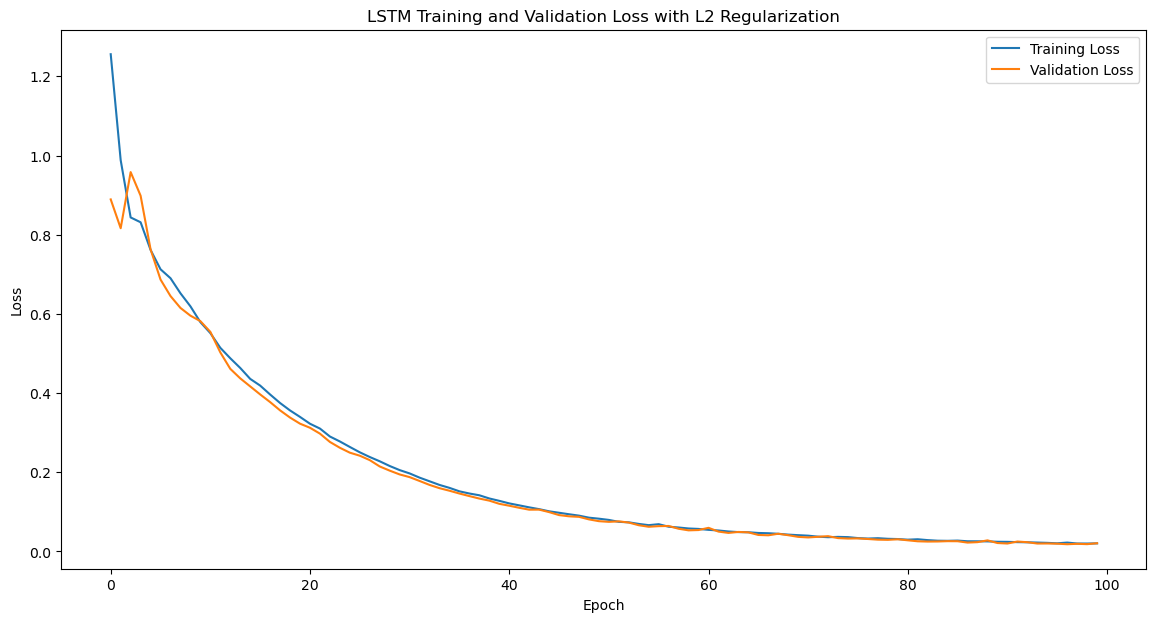

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


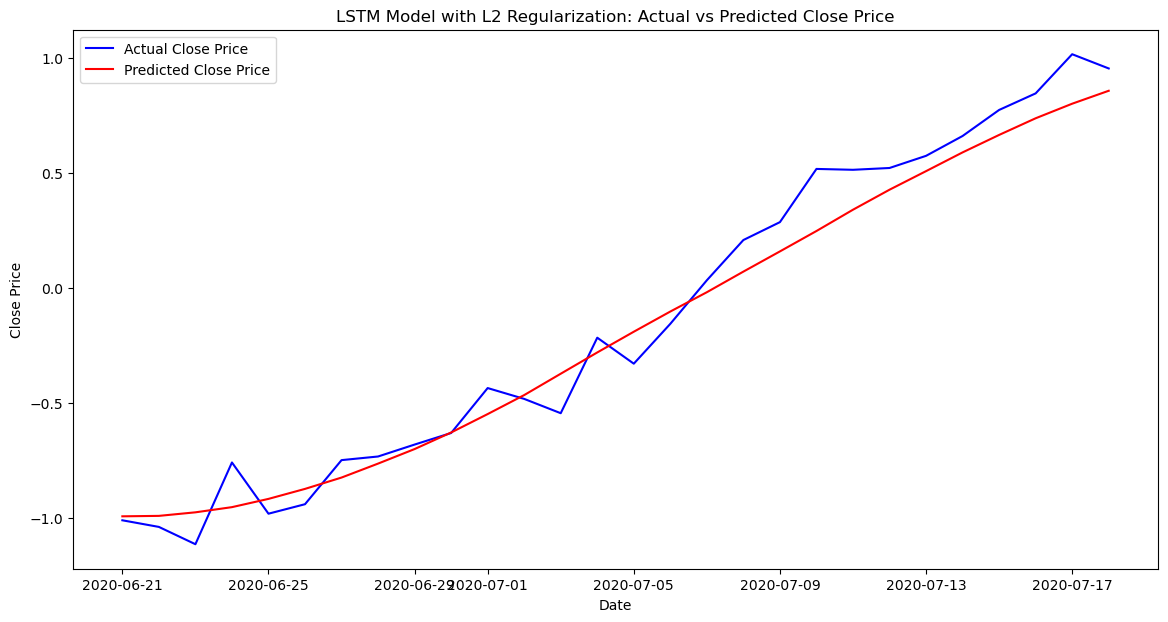

RMSE: 0.1168916769273763
MAE: 0.09776653785059754


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Sample filtered_stock2 DataFrame
data = {
    'Date': pd.date_range(start='2020-01-01', periods=200, freq='D'),
    'Close': np.sin(np.linspace(0, 20, 200)) + np.random.normal(0, 0.1, 200),
    'Sentiments': np.random.rand(200)
}
filtered_stock2 = pd.DataFrame(data)

# Prepare the data
new_df = filtered_stock2[['Close', 'Date', 'Sentiments']].copy()
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.set_index('Date', inplace=True)
new_df.sort_index(inplace=True)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length, :]
        y = data[i + seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model with L2 regularization
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(np.concatenate((predicted_stock_price, X_test[:, -1, 1:]), axis=1))[:, 0]

# Inverse transform the actual stock prices
actual_stock_price = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(new_df.index[-len(y_test):], actual_stock_price, color='blue', label='Actual Close Price')
plt.plot(new_df.index[-len(y_test):], predicted_stock_price, color='red', label='Predicted Close Price')
plt.title('LSTM Model with L2 Regularization: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
r_squared = r2_score(actual_stock_price, predicted_stock_price)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_stock_price, predicted_stock_price)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r_squared}')
print(f'MAPE: {mape}')


RMSE: 0.1168916769273763
MAE: 0.09776653785059754
R-squared: 0.9706593401801349
MAPE: 24.924350621193355
